# Task 4-A

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def stitch_image(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and compute descriptors
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

    # Match descriptors
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []

    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    MIN_MATCH_COUNT = 10

    if len(good_matches) >= MIN_MATCH_COUNT:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        homography, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

        stitched_image = cv2.warpPerspective(image2, homography, (image1.shape[1] + image2.shape[1], image2.shape[0]))

        warpedImage2 = stitched_image.copy()

        stitched_image[:image1.shape[0], :image1.shape[1]] = image1
    return stitched_image

def show_image(image):
    # Display the stitched image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()


# Image 1

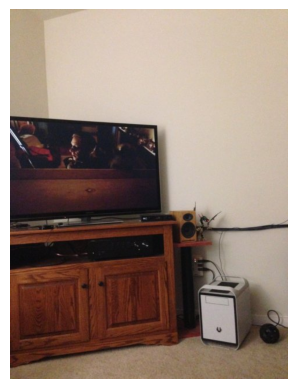

In [2]:
image1 = cv2.imread('stitch1.jpg')
show_image(image1)

# Image 2

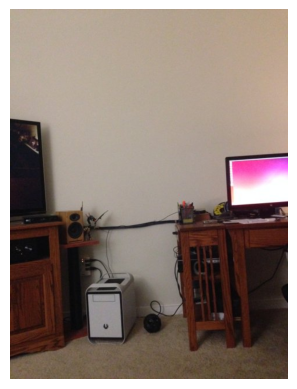

In [3]:
image2 = cv2.imread('stitch2.jpg')
show_image(image2)

# stichted_image1

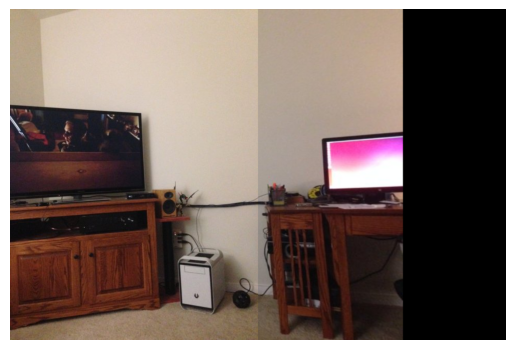

In [4]:
stichted_image1 = stitch_image(image1, image2)
show_image(stichted_image1)

# Image 0

In [5]:
image0 = cv2.imread('stitch0.jpg')
# Image 1

# complete Stictched Image

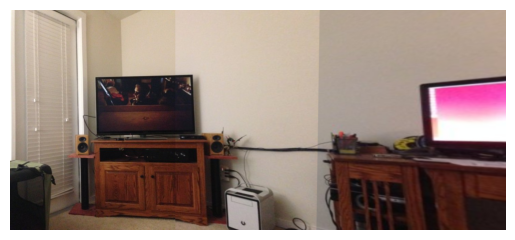

In [6]:
stichted_image2 = stitch_image(image0, stichted_image1)
show_image(stichted_image2)# Image 1

# Task 4-B

In [ ]:
import cv2
import numpy as np

def poisson_blend(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a mask for the region to blend (e.g., foreground object)
    mask = np.where(gray < 240, 1, 0).astype(np.uint8)

    # Perform Poisson blending
    result = cv2.seamlessClone(image, image, mask, (image.shape[1] // 2, image.shape[0] // 2), cv2.NORMAL_CLONE)

    return result

# Apply Poisson blending
blended_image = poisson_blend(stichted_image2)

# Display the blended image
cv2.imshow('Blended Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
